# Training

**Paper:** Automatic identification of Hainan Gibbon calls in passive acoustic recordings

**Authors:** Emmanuel Dufourq, Ian Durbach, James Hansford, Sam Turvey, Amanda Hoepfner

**Code Date:** April 2020

**Repository:** https://github.com/emmanueldufourq/GibbonClassifier

**Notebook description:** Train a CNN on the augmented spectrogram images.

_Please refer to the user manual for further details of the operations being executed in this notebook._

<hr>

**Note 1: Set colab=True if executing on Google Colab, or set colab=False if running locally.**

**Note 2: When running on Google Colab, please select Kernel > ...........**



In [1]:
colab = False

In [2]:
if colab:
    !pip install SoundFile
    from google.colab import drive
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    import tarfile

    # Google Authentication
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # Download data files
    downloaded = drive.CreateFile({'id':"1u7orJHwGOMIcyqwiiEl2e7KEZpnT_0h7"})
    downloaded.GetContentFile('GibbonClassifierData.tar.gz')

    # Extract files to temporary location in Google Drive
    with tarfile.open('GibbonClassifierData.tar.gz', 'r:gz') as tar:
        tar.extractall()

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
from Train_Helper import *

In [5]:
"""
# Run these lines if first time running 
# azureml-core of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'f68334c5-af2d-4e23-a3dc-f09362e5a54f'
resource_group = 'chorus_test'
workspace_name = 'chorus_test_1'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Gibbon')
dataset.download(target_path='.', overwrite=False)
import tarfile

# Extract files to temporary location in Google Drive
with tarfile.open('GibbonClassifierData.tar.gz', 'r:gz') as tar:
    tar.extractall()
"""

"\n# Run these lines if first time running \n# azureml-core of version 1.0.72 or higher is required\nfrom azureml.core import Workspace, Dataset\n\nsubscription_id = 'f68334c5-af2d-4e23-a3dc-f09362e5a54f'\nresource_group = 'chorus_test'\nworkspace_name = 'chorus_test_1'\n\nworkspace = Workspace(subscription_id, resource_group, workspace_name)\n\ndataset = Dataset.get_by_name(workspace, name='Gibbon')\ndataset.download(target_path='.', overwrite=False)\nimport tarfile\n\n# Extract files to temporary location in Google Drive\nwith tarfile.open('GibbonClassifierData.tar.gz', 'r:gz') as tar:\n    tar.extractall()\n"

In [6]:
"""
Alternative for download data 

!pip install gdown

import gdown
from pathlib import Path

# train
url = 'https://drive.google.com/file/d/1ELtriuMC0bXwSyOSjtlKrZzu_3B0BxH8/view?usp=sharing'
output = 'HGSM3D_0+1_20160429_051600.wav'
gdown.download(url, output, quiet=False, fuzzy=True)
Path(output).rename('Raw_Data/Train/'+output)

# test
url = 'https://drive.google.com/file/d/14MtKQZsrecoQ_yIM_zFExgbJShOVOKsi/view?usp=sharing'
output = 'HGSM3B_0+1_20160308_055700.wav'
gdown.download(url, output, quiet=False, fuzzy=True)
Path(output).rename('Raw_Data/Test/'+output)
"""

"\nAlternative for download data \n\n!pip install gdown\n\nimport gdown\nfrom pathlib import Path\n\n# train\nurl = 'https://drive.google.com/file/d/1ELtriuMC0bXwSyOSjtlKrZzu_3B0BxH8/view?usp=sharing'\noutput = 'HGSM3D_0+1_20160429_051600.wav'\ngdown.download(url, output, quiet=False, fuzzy=True)\nPath(output).rename('Raw_Data/Train/'+output)\n\n# test\nurl = 'https://drive.google.com/file/d/14MtKQZsrecoQ_yIM_zFExgbJShOVOKsi/view?usp=sharing'\noutput = 'HGSM3B_0+1_20160308_055700.wav'\ngdown.download(url, output, quiet=False, fuzzy=True)\nPath(output).rename('Raw_Data/Test/'+output)\n"

## Parameters

In [7]:
audio_directory = 'Raw_Data/Train/'
timestamp_directory = 'Call_Labels/'
save_location = 'Pickled_Data/'
augment_directory = 'Augmented_Data/'
augment_image_directory = 'Augmented_Image_Data/'
training_file = 'Training_Files.txt'

sample_rate = 4800
number_seconds_to_extract = 10
seed = 42
number_iterations = 1
augmentation_probability = 1.0
augmentation_amount_noise = 2
augmentation_amount_gibbon = 10

## Extract segments, preprocessing and augment all training files

In [8]:
execute_preprocessing_all_files(training_file, audio_directory, 
                            sample_rate, timestamp_directory,
                            number_seconds_to_extract, save_location,
                            augmentation_amount_noise, augmentation_probability, 
                            augmentation_amount_gibbon, seed, augment_directory, augment_image_directory,
                            number_iterations)

Processing file: HGSM3D_0+1_20160429_051600.wav
Reading audio file (this can take some time)...

Reading done.

Extracting segments done. Pickle files saved.

gibbon_extracted: (369, 48000)
non_gibbon_extracted: (1179, 48000)

gibbon_extracted_augmented: (3690, 48000)
non_gibbon_extracted_augmented: (3690, 48000)

gibbon_extracted_augmented_image: (3690, 128, 188, 1)
non_gibbon_extracted_augmented_image: (3690, 128, 188, 1)

Augmenting done. Pickle files saved to...


## Begin training

Loading data...

----------------------------------
Reading file: HGSM3D_0+1_20160429_051600.wav
Reading file gibbon augmented file:  HGSM3D_0+1_20160429_051600
Reading non-gibbon augmented file: HGSM3D_0+1_20160429_051600

Gibbon features: (3690, 128, 188, 1)
Non-gibbon features (3690, 128, 188, 1)

Data loaded.
Processing...
Processing done.

Shape of X (7380, 128, 188, 1)
Shape of Y (7380, 2)
Iteration 0 starting...
experiment_id: 0
X_train: (5904, 128, 188, 1)
Y_train: (5904, 2)

X_val: (1476, 128, 188, 1)
Y_val: (1476, 2)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 113, 173, 8)       2056      
_________________________________________________________________
dropout (Dropout)            (None, 113, 173, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 43, 8)     

<Figure size 432x288 with 0 Axes>

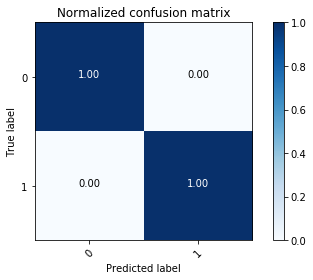

Iteration 0 ended...
Results saved to:
Experiments/train_test_performance_43994.txt
-------------------


In [9]:
train_model(number_iterations, augment_image_directory, training_file)